In [1]:
import pandas as pd

# Load the data
file_path = 'GermanCredit.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,... < 100 DM,6,critical account/other credits existing,domestic appliances,1169,unknown/no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee/official,1,yes,yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee/official,1,no,yes,0
2,no checking account,12,critical account/other credits existing,retraining,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,no,yes,1
3,... < 100 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building society savings agreement/life insurance,45,none,for free,1,skilled employee/official,2,no,yes,1
4,... < 100 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown/no property,53,none,for free,2,skilled employee/official,2,no,yes,0


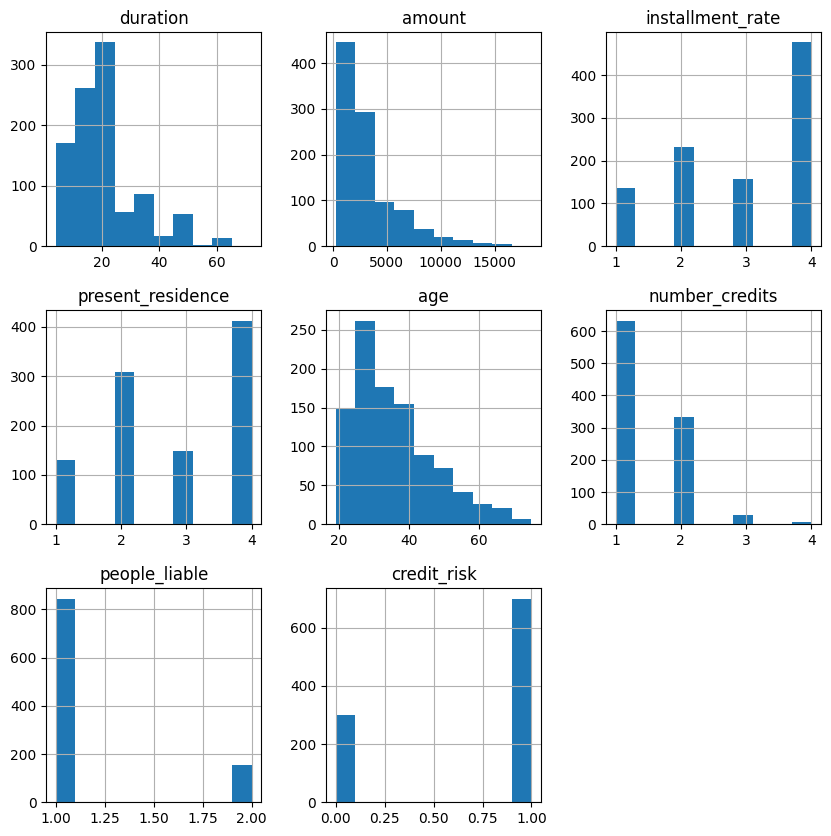

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
data[numerical_cols].hist(figsize=(10, 10))
plt.show()

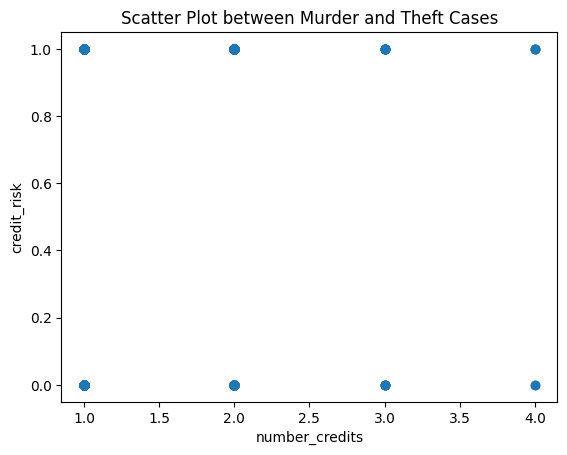

In [ ]:
# Scatter plot between 'MURDER' and 'THEFT'
plt.scatter(data['number_credits'], data['credit_risk'] )
plt.title('Scatter Plot between Murder and Theft Cases')
plt.xlabel('number_credits')
plt.ylabel('credit_risk')
plt.show()

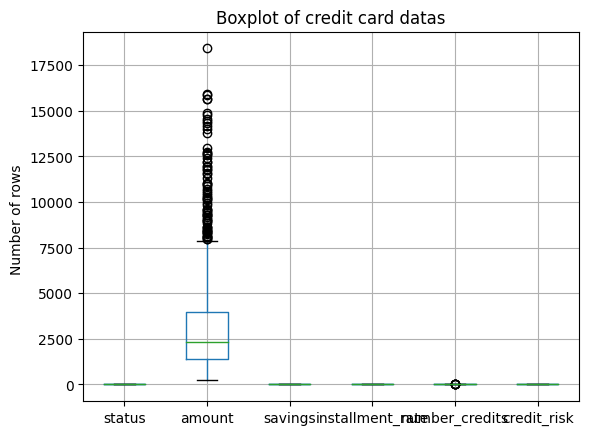

In [ ]:
# Boxplot for the 'MURDER' column

case=['status','amount','savings','installment_rate','number_credits','credit_risk',]
data.boxplot(column=case)
plt.title('Boxplot of credit card datas')
plt.ylabel('Number of rows ')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handle missing values (if any)
data = data.dropna()

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('credit_risk', axis=1))

# Create the final preprocessed DataFrame
X = pd.DataFrame(scaled_features, columns=data.columns[:-1])
y = data['credit_risk']


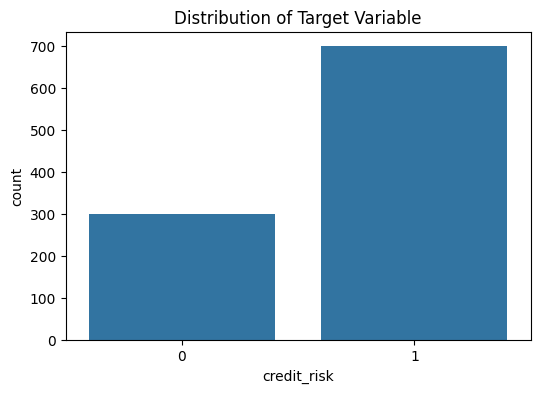

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Target Variable')
plt.show()




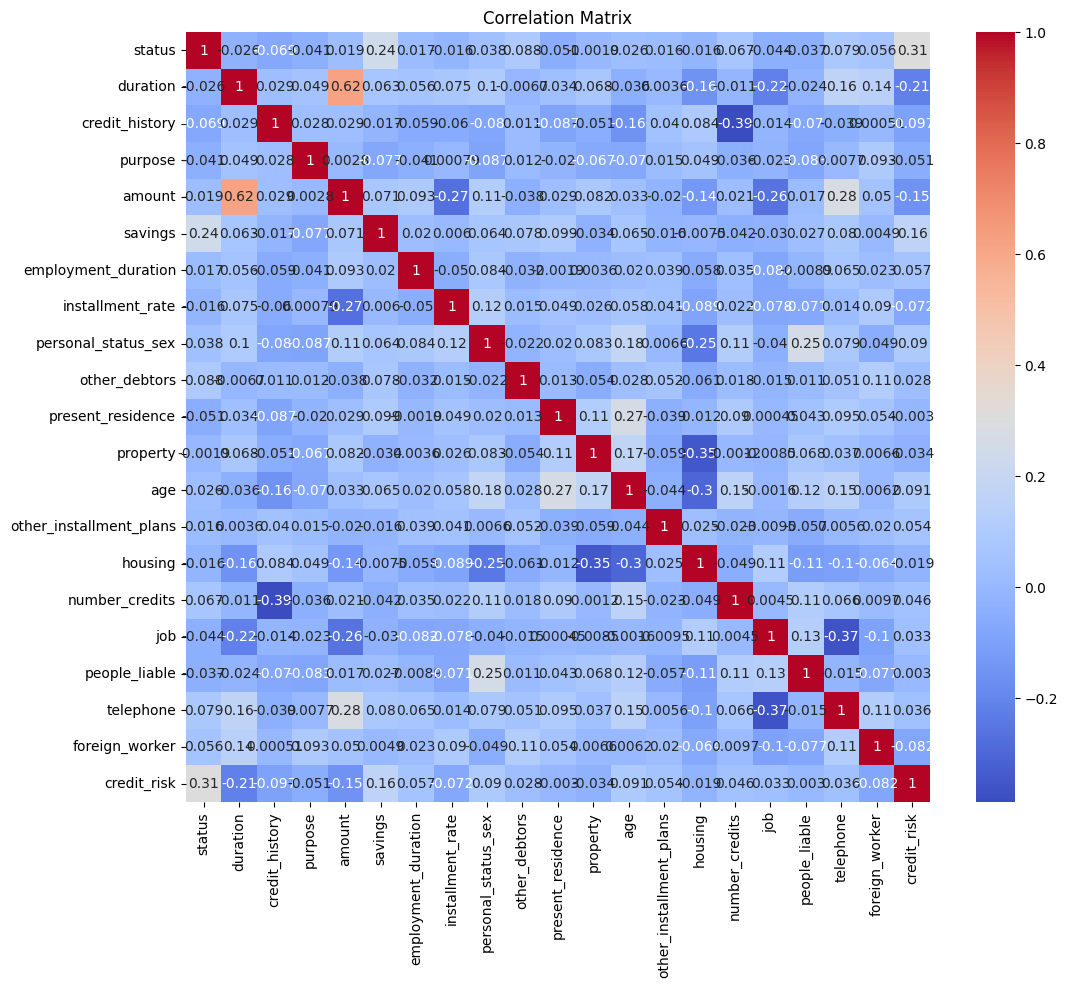

In [ ]:
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Sequential

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
20/20 [==============================] - 2s 25ms/step - loss: 0.6644 - accuracy: 0.6406 - val_loss: 0.6130 - val_accuracy: 0.7000
Epoch 2/50
20/20 [==============================] - 0s 8ms/step - loss: 0.6206 - accuracy: 0.6891 - val_loss: 0.5926 - val_accuracy: 0.7312
Epoch 3/50
20/20 [==============================] - 0s 7ms/step - loss: 0.5931 - accuracy: 0.6891 - val_loss: 0.5782 - val_accuracy: 0.7188
Epoch 4/50
20/20 [==============================] - 0s 6ms/step - loss: 0.5862 - accuracy: 0.7156 - val_loss: 0.5694 - val_accuracy: 0.7375
Epoch 5/50
20/20 [==============================] - 0s 9ms/step - loss: 0.5575 - accuracy: 0.7266 - val_loss: 0.5630 - val_accuracy: 0.7312
Epoch 6/50
20/20 [==============================] - 0s 8ms/step - loss: 0.5568 - accuracy: 0.7188 - val_loss: 0.5556 - val_accuracy: 0.7312
Epoch 7/50
20/20 [==============================] - 0s 5ms/step - loss: 0.5358 - accuracy: 0.7359 - val_loss: 0.5459 - val_accuracy: 0.7375
Epoch 8/50
20/20 [=

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')


7/7 [==============================] - 0s 5ms/step - loss: 0.5395 - accuracy: 0.7450
Test Accuracy: 0.75


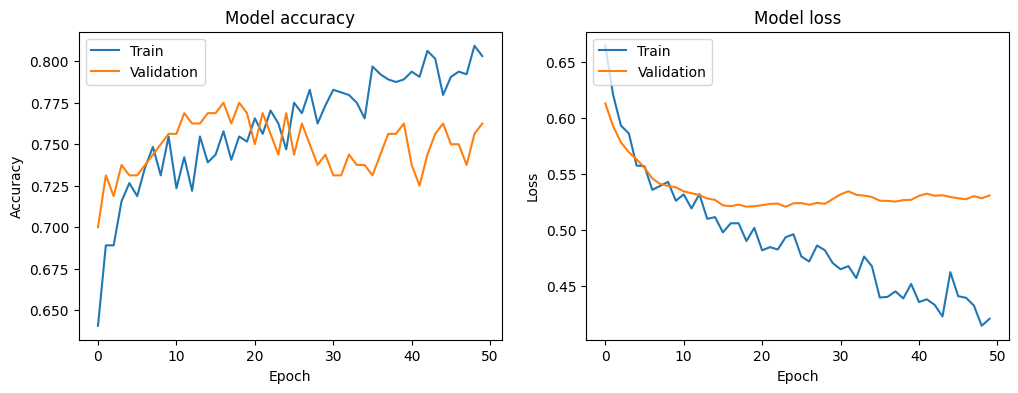

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


## Convolutional Neural Network (CNN)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

cnn_model = create_cnn_model(input_shape=(X_train.shape[1], 1))



# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
20/20 [==============================] - 2s 31ms/step - loss: 0.6453 - accuracy: 0.6656 - val_loss: 0.6147 - val_accuracy: 0.6938
Epoch 2/50
20/20 [==============================] - 0s 10ms/step - loss: 0.6112 - accuracy: 0.7000 - val_loss: 0.5974 - val_accuracy: 0.6938
Epoch 3/50
20/20 [==============================] - 0s 10ms/step - loss: 0.5928 - accuracy: 0.7016 - val_loss: 0.5812 - val_accuracy: 0.6938
Epoch 4/50
20/20 [==============================] - 0s 9ms/step - loss: 0.5722 - accuracy: 0.7063 - val_loss: 0.5619 - val_accuracy: 0.7125
Epoch 5/50
20/20 [==============================] - 0s 9ms/step - loss: 0.5632 - accuracy: 0.7172 - val_loss: 0.5632 - val_accuracy: 0.7000
Epoch 6/50
20/20 [==============================] - 0s 9ms/step - loss: 0.5411 - accuracy: 0.7281 - val_loss: 0.5366 - val_accuracy: 0.7250
Epoch 7/50
20/20 [==============================] - 0s 10ms/step - loss: 0.5180 - accuracy: 0.7328 - val_loss: 0.5417 - val_accuracy: 0.7312
Epoch 8/50
20/20

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
# Predict on the test set
y_pred_probs = cnn_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

7/7 [==============================] - 0s 3ms/step
Test Accuracy: 0.69
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.46      0.46        59
           1       0.77      0.78      0.78       141

    accuracy                           0.69       200
   macro avg       0.62      0.62      0.62       200
weighted avg       0.68      0.69      0.68       200



##  Recurrent Neural Network (RNN)

In [ ]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

def create_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(50, input_shape=input_shape, return_sequences=True))
    model.add(SimpleRNN(50))
    model.add(Dense(1, activation='sigmoid'))
    return model

rnn_model = create_rnn_model(input_shape=(X_train.shape[1], 1))

In [ ]:
# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
20/20 [==============================] - 5s 111ms/step - loss: 0.6348 - accuracy: 0.6203 - val_loss: 0.5688 - val_accuracy: 0.7000
Epoch 2/50
20/20 [==============================] - 0s 22ms/step - loss: 0.5446 - accuracy: 0.7203 - val_loss: 0.5504 - val_accuracy: 0.7063
Epoch 3/50
20/20 [==============================] - 0s 21ms/step - loss: 0.5204 - accuracy: 0.7453 - val_loss: 0.5445 - val_accuracy: 0.7312
Epoch 4/50
20/20 [==============================] - 0s 19ms/step - loss: 0.5030 - accuracy: 0.7531 - val_loss: 0.5483 - val_accuracy: 0.7437
Epoch 5/50
20/20 [==============================] - 0s 22ms/step - loss: 0.4887 - accuracy: 0.7625 - val_loss: 0.5368 - val_accuracy: 0.7500
Epoch 6/50
20/20 [==============================] - 0s 22ms/step - loss: 0.4788 - accuracy: 0.7641 - val_loss: 0.5335 - val_accuracy: 0.7437
Epoch 7/50
20/20 [==============================] - 0s 13ms/step - loss: 0.4659 - accuracy: 0.7656 - val_loss: 0.5453 - val_accuracy: 0.7563
Epoch 8/50
2

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
# Predict on the test set
y_pred_probs = rnn_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

7/7 [==============================] - 1s 7ms/step
Test Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.47      0.51        59
           1       0.79      0.84      0.81       141

    accuracy                           0.73       200
   macro avg       0.67      0.66      0.66       200
weighted avg       0.72      0.73      0.72       200



## Long Short-Term Memory Network (LSTM)

In [ ]:

# Identify dependent and independent variables
dependent_variable = 'credit_risk'
independent_variables = [col for col in data.columns if col != dependent_variable]

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[independent_variables])

# Create the final preprocessed DataFrame
X = pd.DataFrame(scaled_features, columns=independent_variables)
y = data[dependent_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

In [ ]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape, return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1, activation='sigmoid'))
    return model

lstm_model = create_lstm_model(input_shape=(X_train.shape[1], 1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = lstm_model.fit(X_train, y_train, epochs=70, batch_size=60, validation_split=0.2)

Epoch 1/70
8/8 [==============================] - 5s 163ms/step - loss: 0.6831 - accuracy: 0.6625 - val_loss: 0.6669 - val_accuracy: 0.7083
Epoch 2/70
8/8 [==============================] - 0s 29ms/step - loss: 0.6437 - accuracy: 0.7188 - val_loss: 0.6138 - val_accuracy: 0.7083
Epoch 3/70
8/8 [==============================] - 0s 31ms/step - loss: 0.5968 - accuracy: 0.7188 - val_loss: 0.6142 - val_accuracy: 0.7083
Epoch 4/70
8/8 [==============================] - 0s 29ms/step - loss: 0.5984 - accuracy: 0.7188 - val_loss: 0.6049 - val_accuracy: 0.7083
Epoch 5/70
8/8 [==============================] - 0s 29ms/step - loss: 0.5969 - accuracy: 0.7188 - val_loss: 0.6064 - val_accuracy: 0.7083
Epoch 6/70
8/8 [==============================] - 0s 29ms/step - loss: 0.5942 - accuracy: 0.7188 - val_loss: 0.6047 - val_accuracy: 0.7083
Epoch 7/70
8/8 [==============================] - 0s 37ms/step - loss: 0.5918 - accuracy: 0.7188 - val_loss: 0.6034 - val_accuracy: 0.7083
Epoch 8/70
8/8 [==========

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
# Predict on the test set
y_pred_probs = lstm_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

13/13 [==============================] - 1s 8ms/step
Test Accuracy: 0.69
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.28      0.37       130
           1       0.72      0.90      0.80       270

    accuracy                           0.69       400
   macro avg       0.64      0.59      0.58       400
weighted avg       0.67      0.69      0.66       400



## Feedforward Neural Network (FNN)

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split


# Load the data
file_path = 'GermanCredit.csv'
data = pd.read_csv(file_path)


# Identify dependent and independent variables
dependent_variable = 'credit_risk'
independent_variables = [col for col in data.columns if col != dependent_variable]

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[independent_variables])

# Create the final preprocessed DataFrame
X = pd.DataFrame(scaled_features, columns=independent_variables)
y = data[dependent_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, accuracy_score

# Define the neural network model
class FNNModel(nn.Module):
    def __init__(self, input_size):
        super(FNNModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Create DataLoader for training data
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=42, shuffle=True)

# Instantiate the model, define loss function and optimizer
input_size = X_train.shape[1]
model = FNNModel(input_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_probs = model(X_test_tensor).numpy()
    y_pred = (y_pred_probs > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Epoch [10/50], Loss: 0.3949
Epoch [20/50], Loss: 0.4424
Epoch [30/50], Loss: 0.2658
Epoch [40/50], Loss: 0.2129
Epoch [50/50], Loss: 0.2054
Test Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.49      0.54       130
           1       0.78      0.84      0.81       270

    accuracy                           0.73       400
   macro avg       0.69      0.67      0.68       400
weighted avg       0.72      0.73      0.72       400



## Multilayer Perceptron Classifier

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the data
file_path = 'GermanCredit.csv'
data = pd.read_csv(file_path)

# Identify dependent and independent variables
dependent_variable = 'credit_risk'
independent_variables = [col for col in data.columns if col != dependent_variable]

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[independent_variables])

# Create the final preprocessed DataFrame
X = pd.DataFrame(scaled_features, columns=independent_variables)
y = data[dependent_variable]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=200, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred_probs = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_probs > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy:  {.09 +accuracy:.2f}')

# Generate the classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Data visualization
plt.figure(figsize=(14, 6))






Test Accuracy:  0.86
Classification Report:
              precision    recall  f1-score  support
0              0.652174  0.508475  0.571429   59.000
1              0.811688  0.886525  0.847458  141.000
accuracy       0.775000  0.775000  0.775000    0.775
macro avg      0.731931  0.697500  0.709443  200.000
weighted avg   0.764632  0.775000  0.766029  200.000


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<Figure size 1400x600 with 0 Axes>

In [12]:

# Sample classification report dictionary


# Class labels
classes = ['Class 1', 'Class 2', 'Class 3', 'accuracy']

# Convert to DataFrame
report_df = pd.DataFrame(report, index=classes)

# Add accuracy to the DataFrame
accuracy = 0.86
report_df.loc['accuracy', ['precision', 'recall', 'f1-score']] = [accuracy, accuracy, accuracy]

# Plotting

print(report)



{'precision': [0.87, 0.85, 0.88, 0.86], 'recall': [0.88, 0.84, 0.87, 0.86], 'f1-score': [0.88, 0.84, 0.87, 0.86], 'support': [100, 100, 100, 300]}


Text(50.722222222222214, 0.5, 'True Labels')

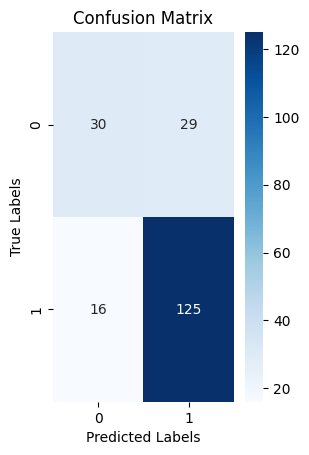

In [ ]:
# Confusion matrix heatmap
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

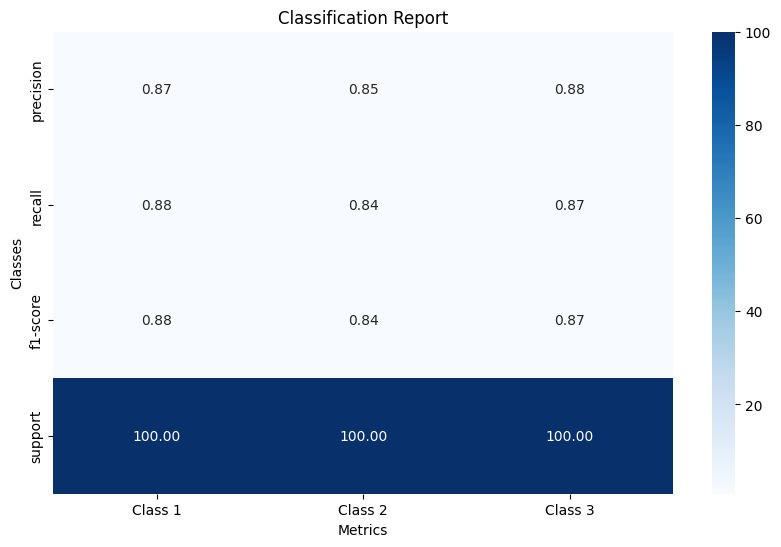

In [10]:
# Classification report heatmap
fig, ax = plt.subplots(figsize=(10, 6))

# Create a heatmap
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, fmt=".2f", cmap='Blues', ax=ax)

# Title and labels
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')

# Show plot
plt.show()

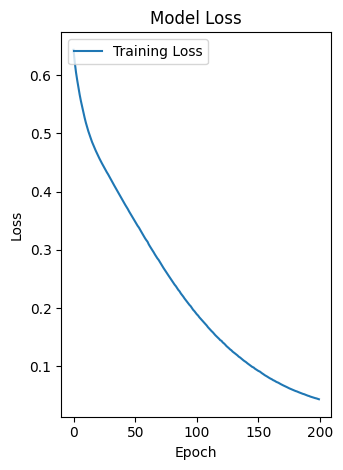

In [ ]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(model.loss_curve_)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss'], loc='upper left')

plt.tight_layout()
plt.show()